## Create a frame for the blank level 0, KPF data
Size estimates from this link: https://exoplanets.atlassian.net/wiki/spaces/shrek/pages/2387738641/KPF+File+Size+Estimates

In [396]:
import numpy as np
import astropy
import astropy.io.fits as fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

header_input = "KPF_Header_Keywords_L0_primary_v2.csv"
# Generate Primary header, using .csv generated from this google doc:
#     https://docs.google.com/spreadsheets/d/1KSnc97G3-a-KX-oOfFaUmeWDBvDIvkW247lQMb6KEsY/edit#gid=1802788034

In [397]:
# Setup dimensions of each green and red amplifier and create an HDU that will be the same 8x (2chips, 4 amps)
xdim = 2200
ydim = 2200
im = np.zeros([ydim,xdim],dtype=np.float32)

HDU_names = ['GREEN_AMP1','GREEN_AMP2','GREEN_AMP3','GREEN_AMP4',
             'RED_AMP1','RED_AMP2','RED_AMP3','RED_AMP4']

# Header, read in .csv
head_amp = pd.read_csv(header_input,usecols= ['Keyword','Value','Description','Keep','HDU'])
head_amp = head_amp[ (head_amp['Keep'] == 'y') & (head_amp['HDU'] == '1')]
head_amp = head_amp[['Keyword','Value','Description']]
head_amp['Value'].fillna(0,inplace=True)

hdr_amp = fits.Header()
hdr_amp['XTENSION'] = 1

tuple_list_amp=tuple(head_amp.itertuples(index=False, name=None))

for tup in tuple_list_amp:
#    print(tup)
    hdr_amp.append(tup)
    
hdu1 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[0]) # 8 of these, four green, four red
hdu2 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[1]) 
hdu3 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[2]) 
hdu4 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[3]) 

hdu5 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[4]) # 8 of these, four green, four red
hdu6 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[5]) 
hdu7 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[6]) 
hdu8 = fits.ImageHDU(im,header = hdr_amp,name = HDU_names[7]) 
#print(repr(hdr_amp))

In [398]:
# Now insert the simulated data into the green ccd HDUs
# Open KPF simulated data:
sim_dir = '/Users/hisaacson/ownCloud/KPF-Pipeline-TestData/KPF-Pipeline-TestData/KPF_Simulated_Data/'
sim_sci = 'KPF_simulated_L0_science.fits'

hdu_sim = fits.open(sim_dir+sim_sci)
data1_sim = hdu_sim['GREEN-AMP1'].data
data2_sim = hdu_sim['GREEN-AMP2'].data
data3_sim = hdu_sim['GREEN-AMP3'].data
data4_sim = hdu_sim['GREEN-AMP4'].data

hdu1.data = data1_sim
hdu2.data = data2_sim
hdu3.data = data3_sim
hdu4.data = data4_sim

hdu_sim.info()

Filename: /Users/hisaacson/ownCloud/KPF-Pipeline-TestData/KPF-Pipeline-TestData/KPF_Simulated_Data/KPF_simulated_L0_science.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  GREEN-AMP1    1 ImageHDU         8   (2200, 2200)   float32   
  2  GREEN-AMP2    1 ImageHDU         8   (2200, 2200)   float32   
  3  GREEN-AMP3    1 ImageHDU         8   (2200, 2200)   float32   
  4  GREEN-AMP4    1 ImageHDU         8   (2200, 2200)   float32   
  5  GREEN-CCD     1 ImageHDU         8   (4080, 4080)   float32   


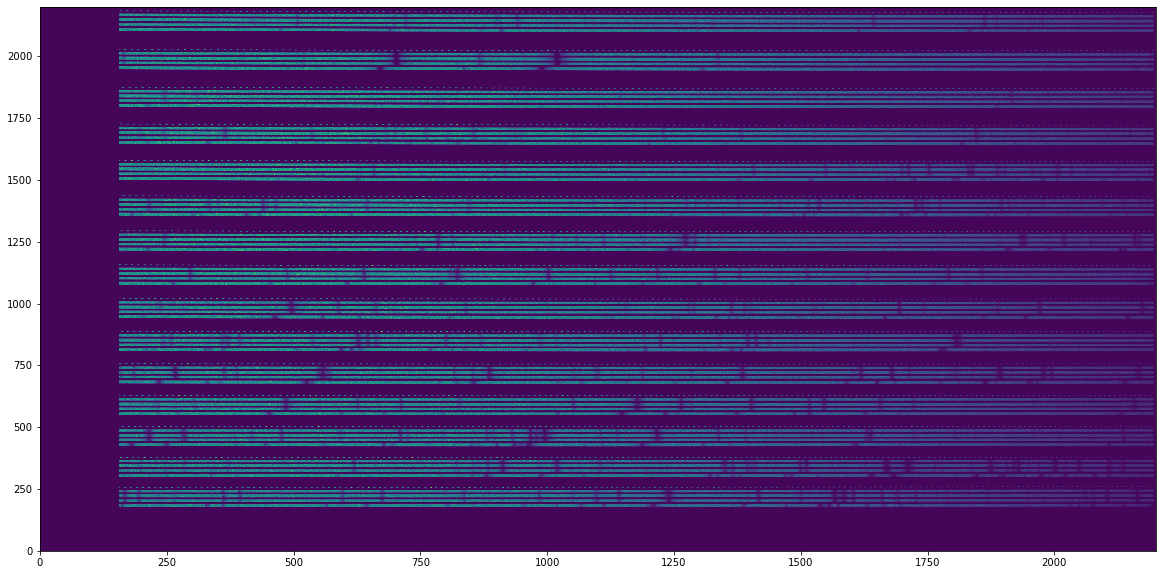

In [399]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)
plt.imshow(hdu4.data[:,0:],origin = 'lower',aspect = 'auto',vmin=0,interpolation = 'none')


In [400]:
# Setup HDU for Ca HK spectrometer [HDU-9], exposure meter [HDU-10], guide camera[HDU-10], 
dim2 = 1024
imHK = np.zeros([dim2,dim2],dtype=np.int16)
im_guider = np.zeros([dim2,dim2],dtype=np.int16)
im_expm = np.zeros([dim2,dim2],dtype=np.float32)

head_hk = pd.read_csv(header_input,usecols= ['Keyword','Value','Description','Keep','HDU'])
head_hk = head_hk[ (head_hk['Keep'] == 'y') & (head_hk['HDU'] == '9')]
head_hk =head_hk[['Keyword','Value','Description']]
head_hk['Value'].fillna(0,inplace=True)

hdr_hk = fits.Header()
# hdr_hk['XTENSION'] = 9

tuple_list_hk=tuple(head_hk.itertuples(index=False, name=None))

for tup in tuple_list_hk:
#    print(tup)
    hdr_hk.append(tup)
    
hdu_hk = fits.ImageHDU(imHK,header = hdr_hk,name='CA_HK')
hdu_expm = fits.ImageHDU(im_expm,header = hdr_hk,name='EXPMETER')
hdu_gc = fits.ImageHDU(im_guider,header = hdr_hk,name='GUIDER')

In [401]:
# Header, read in .csv
headP_small = pd.read_csv(header_input,usecols= ['Keyword','Value','Description','Keep','HDU'])
headP_small = headP_small[ (headP_small['Keep'] == 'y') & (headP_small['HDU'] == '0')]
headP_small=headP_small[['Keyword','Value','Description']]
headP_small['Value'].fillna(0,inplace=True)

hdr = fits.Header()
#hdr['OBSERVER'] = 'Edwin Hubble' # TEST
#hdr['COMMENT'] = 'Here is some commentary about this FITS file.' #TEST

# Create list of tuples to iterate over and append to header
tuple_list=tuple(headP_small.itertuples(index=False, name=None))

for tup in tuple_list:
#    print(tup)
    hdr.append(tup)

empty_primary = fits.PrimaryHDU(header=hdr) 
#print(repr(hdr))

In [402]:
# Create a BinTableHDU for the SOLAR_IRRADIANCE
#arr = np.zeros(1000)
c1 = fits.Column(name='a', array=np.array([1, 20]), format='K')
hdu_solar = fits.BinTableHDU.from_columns([c1],name='SOLAR_IRRADIANCE')


In [408]:
hdul_all = fits.HDUList([empty_primary,hdu1,hdu2,hdu3,hdu4,hdu5,hdu6,hdu7,hdu8, hdu_hk,hdu_expm,hdu_gc,hdu_solar])
hdul_all.info()
hdul_all.writeto('L0_data_format_w_headers_20210901.fits',overwrite=True)
#print(hdual_all[0].head)

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  GREEN_AMP1    1 ImageHDU        23   (2200, 2200)   float32   
  2  GREEN_AMP2    1 ImageHDU        23   (2200, 2200)   float32   
  3  GREEN_AMP3    1 ImageHDU        23   (2200, 2200)   float32   
  4  GREEN_AMP4    1 ImageHDU        23   (2200, 2200)   float32   
  5  RED_AMP1      1 ImageHDU        23   (2200, 2200)   float32   
  6  RED_AMP2      1 ImageHDU        23   (2200, 2200)   float32   
  7  RED_AMP3      1 ImageHDU        23   (2200, 2200)   float32   
  8  RED_AMP4      1 ImageHDU        23   (2200, 2200)   float32   
  9  CA_HK         1 ImageHDU        24   (1024, 1024)   int16   
 10  EXPMETER      1 ImageHDU        24   (1024, 1024)   float32   
 11  GUIDER        1 ImageHDU        24   (1024, 1024)   int16   
 12  SOLAR_IRRADIANCE    1 BinTableHDU     11   2R x 1C   ['K']   


In [409]:
#hdr = fits.Header()
#hdr['OBSERVER'] = 'Edwin Hubble'
#hdr['COMMENT'] = "Here's some commentary about this FITS file."
#empty_primary = fits.PrimaryHDU(header=hdr)

In [410]:
# Open and check
output = fits.open('L0_data_format_w_headers_20210901.fits')
output.info()

Filename: L0_data_format_w_headers_20210901.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  GREEN_AMP1    1 ImageHDU        23   (2200, 2200)   float32   
  2  GREEN_AMP2    1 ImageHDU        23   (2200, 2200)   float32   
  3  GREEN_AMP3    1 ImageHDU        23   (2200, 2200)   float32   
  4  GREEN_AMP4    1 ImageHDU        23   (2200, 2200)   float32   
  5  RED_AMP1      1 ImageHDU        23   (2200, 2200)   float32   
  6  RED_AMP2      1 ImageHDU        23   (2200, 2200)   float32   
  7  RED_AMP3      1 ImageHDU        23   (2200, 2200)   float32   
  8  RED_AMP4      1 ImageHDU        23   (2200, 2200)   float32   
  9  CA_HK         1 ImageHDU        24   (1024, 1024)   int16   
 10  EXPMETER      1 ImageHDU        24   (1024, 1024)   float32   
 11  GUIDER        1 ImageHDU        24   (1024, 1024)   int16   
 12  SOLAR_IRRADIANCE    1 BinTableHDU     11   2R x 1C   [K]   
